<p style="align: center;"><img align=center src="https://mailfit.com/wp-content/uploads/2019/11/lego-5.png"  width=900></p>
<h1 style="text-align: center;"><b>«Практика. Применение простых инструментов для работы с ненормальными распределениями»</b></h3>


In [2]:
import numpy as np  
import pandas as pd  # для работы с таблицами

from scipy import stats # При работе со статистикой

import matplotlib.pyplot as plt  # Библиотека для визуализации результатов 
import seaborn as sns # Более продвинутая библиотека для визуализации

# Рынок жилья в New York City

In [6]:
url  = 'https://raw.githubusercontent.com/a-milenkin/datasets_for_t-tests/main/AB_NYC_2019.csv'
df = pd.read_csv(url, on_bad_lines='skip')
df.dropna(how='any', inplace=True)
df.head(3)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194


<Axes: >

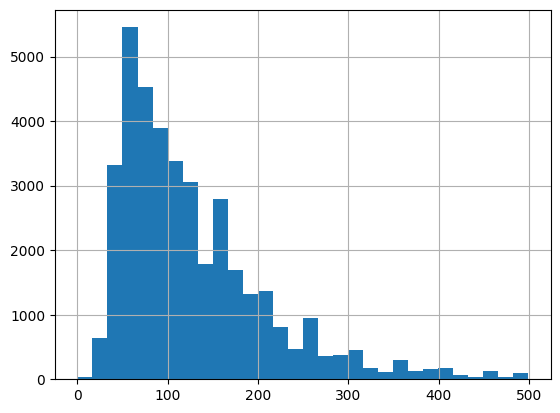

In [7]:
df[df.price<500].price.hist(bins=30)

<div class="alert alert-info">
<b>Выполним тест Шапиро-Уилка на нормальность!</b>

Тест Шапиро-Уилка проверяет нулевую гипотезу о том, что данные были взяты из нормального распределения.

In [8]:
statistic, p_value = stats.shapiro(df.price)  

print('Статистики=%.3f, p=%.3f' % (statistic, p_value))

alpha = 0.05
if p_value > alpha: # Интерпретируем
    # H_0 = Распределение нормальное
    print('Нормальное распределение (не отвергаем H0)')
else:
    print('Не нормальное распределения (отвергаем H0)')

Статистики=0.323, p=0.000
Не нормальное распределения (отвергаем H0)


C:\Users\s.ibodov\AppData\Roaming\Python\Python310\site-packages\scipy\stats\_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 38821.
  res = hypotest_fun_out(*samples, **kwds)


# Можно ли использовать тут наш подход?

C:\Users\s.ibodov\AppData\Roaming\Python\Python310\site-packages\scipy\stats\_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 38085.
  res = hypotest_fun_out(*samples, **kwds)


ShapiroResult(statistic=0.9896899813105923, pvalue=2.6560494502300895e-44)

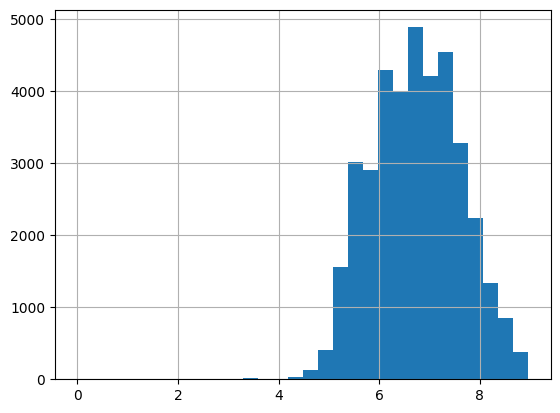

In [9]:
log_data = np.log2(abs(df[df.price<500].price)+1)

log_data.hist(bins=30)

shapiro_test = stats.shapiro(log_data) 
shapiro_test

<div class="alert alert-info">
<b>Заметим</b>

Распределением стало иметь более нормальный вид, но распределние все равно не нормальное. Значит, мы не можем использовать критерий Стьюдента

In [10]:
np.random.seed(42)

normal_data = stats.norm.rvs(loc = 200, scale = 100, size = 1000)

statistic, p_value = stats.shapiro(normal_data)  
 
print('Статистики=%.3f, p=%.3f' % (statistic, p_value))
 

if p_value > alpha: # Интерпретируем
    print('Нормальное распределение (не отвергаем H0)')
else:
    print('Не нормальное распределения (отвергаем H0)')
    
# Не можем отвергнуть гипотезу, что данные из нормального распределения

Статистики=0.999, p=0.627
Нормальное распределение (не отвергаем H0)


# Выбросы и нормальность

In [11]:
np.random.seed(42)
normal_data = stats.norm.rvs(loc = 200, scale = 100, size = 1000)  #Сгенерируем выборку
outliers_data = stats.norm.rvs(loc = 200, scale = 1000, size = 10) # Добавим всего лишь 10 выбросов
dirty_data = np.append(normal_data, outliers_data)

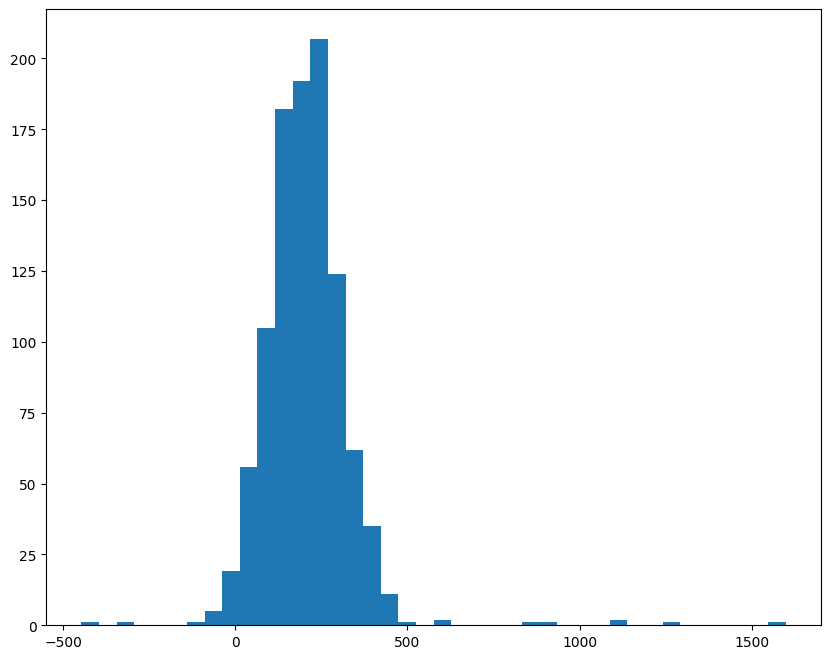

In [12]:
plt.figure(figsize=(10, 8))
plt.hist(dirty_data, bins=40);

In [13]:
statistic, p_value = stats.shapiro(dirty_data)  
 
print('Статистики=%.3f, p=%.3f' % (statistic, p_value))
 

if p_value > alpha: # Интерпретируем
    print('Нормальное распределение (не отвергаем H0)')
else:
    print('Не нормальное распределения (отвергаем H0)')

Статистики=0.826, p=0.000
Не нормальное распределения (отвергаем H0)


# Удалим выбросы

In [14]:
clear_data = dirty_data[(dirty_data>-100) & (dirty_data<500)]  # удаляем выбросы


statistic, p_value = stats.shapiro(clear_data)  
 
print('Статистики=%.3f, p=%.3f' % (statistic, p_value))
 

if p_value > alpha: # Интерпретируем
    print('Нормальное распределение (не отвергаем H0)')
else:
    print('Не нормальное распределения (отвергаем H0)')

Статистики=0.998, p=0.271
Нормальное распределение (не отвергаем H0)


# Выводы:

- Не всегда реальный данные будут иметь нормалный вид
- Нормальность данных легко можно проверить визуально или с критерий Шапиро-Уилка
- Выбросы портять распределение - от них надо избавляться
